<a href="https://colab.research.google.com/github/MadhuriKonnur/Person_Car_Detection/blob/main/Det_mk_EV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Object Detection
         By : Madhuri Konnur

The goal of this task is to train a model that
can localize and classify each instance of person and car as accurately as possible.

Link to download the dataset: https://evp-ml-data.s3.us-east-2.amazonaws.com/ml-
interview/openimages-personcar/trainval.tar.gz

Annotation format:COCO



Using the open-source machine learning developer tool, **FiftyOne**, to easily work with and visualize image and video datasets with annotations and model predictions 

In [1]:
# Installing fiftyone and ETA for models  (# need to restart runtime once installed)
!pip install fiftyone  --no-binary fiftyone,voxel51-eta

     |████████████████████████████████| 1.2 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 13.2 MB 28.3 MB/s 
     |████████████████████████████████| 79.9 MB 117 kB/s 
     |████████████████████████████████| 106 kB 67.4 MB/s 
     |████████████████████████████████| 29.2 MB 1.3 MB/s 
     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 131 kB 62.6 MB/s 
     |████████████████████████████████| 640 kB 62.0 MB/s 
     |████████████████████████████████| 534 kB 56.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 226 kB 31.9 MB/s 
     |████████████████████████████████| 508 kB 62.9 MB/s 
     |████████████████████████████████| 84 kB 2.8 MB/s 
     |████████████████████████████████| 68 kB 5.9 MB/s 


In [2]:
# to run eta model installed
!eta install models       # need to restart runtime

Cloning https://github.com/voxel51/models
Cloning into '/usr/local/lib/python3.7/dist-packages/eta/tensorflow/models'...
remote: Enumerating objects: 30876, done.
remote: Total 30876 (delta 0), reused 0 (delta 0), pack-reused 30876
Receiving objects: 100% (30876/30876), 532.07 MiB | 29.53 MiB/s, done.
Resolving deltas: 100% (19431/19431), done.
Installing protobuf
Found protoc
Compiling protocol buffers
Installing tf_slim
     |████████████████████████████████| 352 kB 5.4 MB/s 
Installation complete


In [1]:
# Mounting Gdrive (downloaded in gdrive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# installing fiftyone libs
import fiftyone as fo
import fiftyone.zoo as foz


In [3]:
# Data image & json location 
data_path = "/content/drive/MyDrive/Colab_Notebooks/EagleView/dataset/images"
labels_path = "/content/drive/MyDrive/Colab_Notebooks/EagleView/dataset/annotations/bbox-annotations.json"

If you have model predictions stored in COCO format, then you can use add_coco_labels() to conveniently add the labels to an existing dataset.

 below demonstrates a round-trip export and then re-import of both images-and-labels and labels-only data in COCO format

In [6]:


import fiftyone.utils.coco as fouc

dataset = foz.load_zoo_dataset("quickstart")
classes = dataset.distinct("predictions.detections.label")

# Export images and ground truth labels to disk
dataset.export(
    export_dir=data_path,
    dataset_type=fo.types.COCODetectionDataset,
    classes=classes,
    label_field="ground_truth",
)

# Export predictions
dataset.export(
    dataset_type=fo.types.COCODetectionDataset,
    labels_path=labels_path,
    classes=classes,
    label_field="predictions",
)

# Now load ground truth labels into a new dataset
dataset2 = fo.Dataset.from_dir(
    dataset_dir=data_path,
    dataset_type=fo.types.COCODetectionDataset,
    label_field="ground_truth",
)

# And add model predictions
fouc.add_coco_labels(
    dataset2,
    "predictions",
    labels_path,
    classes=classes,
)

# Verify that ground truth and predictions were imported as expected
print(dataset.count("ground_truth.detections"))
print(dataset2.count("ground_truth.detections"))
print(dataset.count("predictions.detections"))
print(dataset2.count("predictions.detections"))

Dataset already downloaded
Loading existing dataset 'quickstart'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
Directory '/content/drive/MyDrive/Colab_Notebooks/EagleView/dataset/images' already exists; export will be merged with existing files
 100% |█████████████████| 200/200 [5.1s elapsed, 0s remaining, 34.4 samples/s]      
 100% |█████████████████| 200/200 [3.6s elapsed, 0s remaining, 34.3 samples/s]      
 100% |█████████████████| 200/200 [1.1s elapsed, 0s remaining, 175.2 samples/s]         
1232
1232
5620
5620


In [7]:
print(dataset2)

Name:        2022.02.06.17.28.20
Media type:  image
Num samples: 200
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    predictions:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [8]:
# List available zoo models
model_names = foz.list_zoo_models()
print(model_names)

['alexnet-imagenet-torch', 'centernet-hg104-1024-coco-tf2', 'centernet-hg104-512-coco-tf2', 'centernet-mobilenet-v2-fpn-512-coco-tf2', 'centernet-resnet101-v1-fpn-512-coco-tf2', 'centernet-resnet50-v1-fpn-512-coco-tf2', 'centernet-resnet50-v2-512-coco-tf2', 'deeplabv3-cityscapes-tf', 'deeplabv3-mnv2-cityscapes-tf', 'deeplabv3-resnet101-coco-torch', 'deeplabv3-resnet50-coco-torch', 'densenet121-imagenet-torch', 'densenet161-imagenet-torch', 'densenet169-imagenet-torch', 'densenet201-imagenet-torch', 'efficientdet-d0-512-coco-tf2', 'efficientdet-d0-coco-tf1', 'efficientdet-d1-640-coco-tf2', 'efficientdet-d1-coco-tf1', 'efficientdet-d2-768-coco-tf2', 'efficientdet-d2-coco-tf1', 'efficientdet-d3-896-coco-tf2', 'efficientdet-d3-coco-tf1', 'efficientdet-d4-1024-coco-tf2', 'efficientdet-d4-coco-tf1', 'efficientdet-d5-1280-coco-tf2', 'efficientdet-d5-coco-tf1', 'efficientdet-d6-1280-coco-tf2', 'efficientdet-d6-coco-tf1', 'efficientdet-d7-1536-coco-tf2', 'faster-rcnn-inception-resnet-atrous-v2-

# Model Building 
model: ssd-mobilenet-v1-fpn-coco-tf
Taken from list of zoo_models

-------------Detection----------------

In [9]:
# Load a model and generate predictions
model = foz.load_zoo_model("ssd-mobilenet-v1-fpn-coco-tf")
#coco_dataset.apply_model(model, label_field="predictions")

 100% |████|  391.7Mb/391.7Mb [320.3ms elapsed, 0s remaining, 1.2Gb/s]        


# Training  model

In [10]:
dataset2.apply_model(model,label_field="predictions") 

 100% |█████████████████| 200/200 [7.7m elapsed, 0s remaining, 0.4 samples/s]     


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


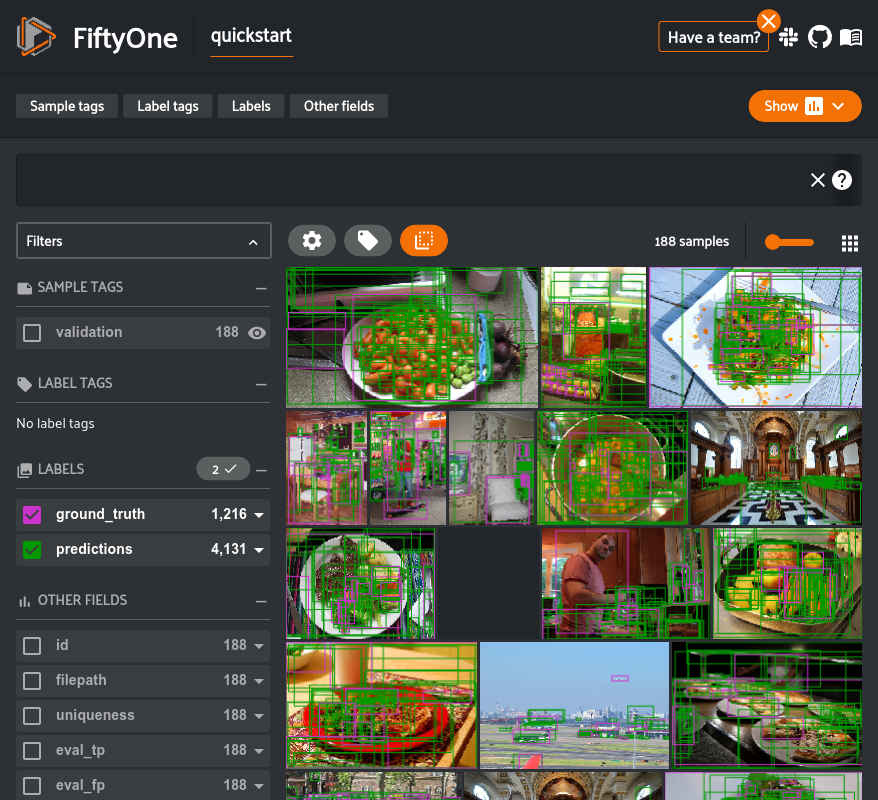

<IPython.core.display.Javascript object>

In [11]:
#Launch the FiftyOne App to view dataset
session = fo.launch_app(dataset2)

In [37]:
results = dataset2.evaluate_detections(
    "predictions",
    gt_field="ground_truth",
    method="coco",
    eval_key="eval",
    compute_mAP=True,
)

Evaluating detections...
 100% |█████████████████| 200/200 [4.3s elapsed, 0s remaining, 36.8 samples/s]      
Performing IoU sweep...
 100% |█████████████████| 200/200 [5.4s elapsed, 0s remaining, 27.3 samples/s]      


In [38]:
print(results.mAP())


0.367931459380624


In [47]:
session = fo.launch_app(dataset2)

In [53]:
plot = results.plot_pr_curves(classes=["person", "car"])


plot.show()



In [54]:
# Confusion matrix
# Perform evaluation, allowing objects to be matched between classes
results = dataset2.evaluate_detections(
    "predictions",
    gt_field="ground_truth",
    method="coco",
    classwise=False,
)

Evaluating detections...
 100% |█████████████████| 200/200 [3.9s elapsed, 0s remaining, 36.2 samples/s]      


The slight drop in mAP is expected when matching predicted objects with ground truth of different classes, but this is desirable when trying to closely evaluate and understand your model. By default, when classwise=True, all false positives indicate that a predicted object was left unmatched. On the other hand, with classwise=False, some false positives now indicate that a prediction matched a ground truth object with a different class. This implies that the model was confident about the object being the incorrect class and that is information that we want to know.

In [59]:
# Plot confusion matrix
plot = results.plot_confusion_matrix(classes=["person","car"])
plot.show(height=600)

# Connect to session
session.plots.attach(plot)

/usr/local/lib/python3.7/dist-packages/fiftyone/core/plots/plotly.py:1441: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



In [62]:
# List evaluations you've run on a dataset
dataset2.list_evaluations()
# ['eval_predictions']

# Print information about an evaluation
print(dataset2.get_evaluation_info("eval"))

# Delete the evaluation
# This will remove any evaluation data that was populated on your dataset
#dataset.delete_evaluation("eval")

{
    "key": "eval",
    "version": "0.14.3",
    "timestamp": "2022-02-06T18:28:26.881000",
    "config": {
        "method": "coco",
        "cls": "fiftyone.utils.eval.coco.COCOEvaluationConfig",
        "pred_field": "predictions",
        "gt_field": "ground_truth",
        "iou": 0.5,
        "classwise": true,
        "iscrowd": "iscrowd",
        "use_masks": false,
        "use_boxes": false,
        "tolerance": null,
        "compute_mAP": true,
        "iou_threshs": [
            0.5,
            0.55,
            0.6,
            0.65,
            0.7,
            0.75,
            0.8,
            0.85,
            0.9,
            0.95
        ],
        "max_preds": 100,
        "error_level": 1
    }
}
